# 0. 数据加载

## 0.1 运动员

In [1]:
import pandas as pd

# 读取数据
athletes = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv')

# 删除重复的行
athletes_clean = athletes.drop_duplicates()

# 处理缺失值
athletes_clean = athletes_clean.dropna()

# 转换数据类型
athletes_clean['Year'] = athletes_clean['Year'].astype(int)
athletes_clean['Medal'] = athletes_clean['Medal'].astype(str)

# 删除文字中的空格
# 去除列中所有字符串数据前后的空格
athletes_clean['NOC'] = athletes_clean['NOC'].str.strip()  # 去除前后的空格
athletes_clean['Sport'] = athletes_clean['Sport'].str.strip()
athletes_clean['Name'] = athletes_clean['Name'].str.strip()

# 删除列中所有字符串数据中的空格（包括内部的空格）
athletes_clean['NOC'] = athletes_clean['NOC'].str.replace(' ', '', regex=False)
athletes_clean['Sport'] = athletes_clean['Sport'].str.replace(' ', '', regex=False)
athletes_clean['Name'] = athletes_clean['Name'].str.replace(' ', '', regex=False)
# 打印清洗后的数据
athletes_clean

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,ADijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,ALamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,GunnarAaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia(-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,SeforaAda,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,EmanuelaLiuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [2]:
# 删除 'Name'、'Sex'、'Team'、'City' 和 'Event' 列
athletes_key = athletes_clean.drop(['Name', 'Sex', 'Team', 'City', 'Event'], axis=1)

# 打印删除后的数据
athletes_key


,NOC,Year,Sport,Medal
0,CHN,1992,Basketball,No medal
1,CHN,2012,Judo,No medal
2,DEN,1920,Football,No medal
3,DEN,1900,Tug-Of-War,Gold
4,NED,1932,Athletics,No medal
...,...,...,...,...
252560,GEQ,2024,Athletics,No medal
252561,ITA,2024,Wrestling,No medal
252562,NED,2024,Athletics,Gold
252563,FRA,2024,Equestrian,Bronze


## 0.15 添加sports映射code信息

In [3]:
sport_to_code_df = pd.read_csv('2025_Problem_C_Data/Sport_Code.csv')
sport_to_code = dict(zip(sport_to_code_df['Sport'], sport_to_code_df['Code']))
sport_to_code_df

,Sport,Code
0,3x3 Basketball,BK3
1,"3x3 Basketball, Basketball",BK3
2,Aeronautics,NaN
3,Alpinism,NaN
4,Archery,ARC
...,...,...
71,Tug-Of-War,TOW
72,Volleyball,VVO
73,Water Polo,WPO
74,Weightlifting,WLF


In [4]:

# 使用 map 函数将 Sport 列映射到 Code
athletes_key['Code'] = athletes_key['Sport'].map(sport_to_code)

athletes_key.dropna()
# 打印添加了新列后的 DataFrame
athletes_key

,NOC,Year,Sport,Medal,Code
0,CHN,1992,Basketball,No medal,BKB
1,CHN,2012,Judo,No medal,JUD
2,DEN,1920,Football,No medal,FBL
3,DEN,1900,Tug-Of-War,Gold,TOW
4,NED,1932,Athletics,No medal,ATH
...,...,...,...,...,...
252560,GEQ,2024,Athletics,No medal,ATH
252561,ITA,2024,Wrestling,No medal,WRF
252562,NED,2024,Athletics,Gold,ATH
252563,FRA,2024,Equestrian,Bronze,EDR


## 0.2 东道主

In [5]:
hosts = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv')
# 删除 'Host' 列
hosts_key = hosts.drop('Host', axis=1)

# 去除含有 NaN 的行
hosts_key = hosts_key.dropna()

hosts_key

,Year,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
6,1920,BEL
7,1924,FRA
8,1928,NED
9,1932,USA
13,1948,GBR


## 0.3 获奖情况

In [6]:
medals = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv')

country_to_noc_df = pd.read_csv('2025_Problem_C_Data/NOC_dict_alter.csv')
country_to_noc = dict(zip(country_to_noc_df['Country'], country_to_noc_df['NOC']))

medals['NOC'] = medals['Country'].map(country_to_noc)

medals

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,USA,11,7,2,20,1896
1,2,Greece,GRE,10,18,19,47,1896
2,3,Germany,GER,6,5,2,13,1896
3,4,France,FRA,5,4,2,11,1896
4,5,Great Britain,GBR,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,QAT,0,0,1,1,2024
1431,84,Refugee Olympic Team,ROT,0,0,1,1,2024
1432,84,Singapore,SGP,0,0,1,1,2024
1433,84,Slovakia,SVK,0,0,1,1,2024


In [7]:
# 删除 'Rank'、'Silver' 和 'Bronze' 列
medals_key = medals.drop(['Country','Rank', 'Silver', 'Bronze'], axis=1)
medals_key = medals_key.dropna()
# 打印删除后的数据
medals_key


,NOC,Gold,Total,Year
0,USA,11,20,1896
1,GRE,10,47,1896
2,GER,6,13,1896
3,FRA,5,11,1896
4,GBR,2,7,1896
...,...,...,...,...
1430,QAT,0,1,2024
1431,ROT,0,1,2024
1432,SGP,0,1,2024
1433,SVK,0,1,2024


In [8]:
# 按 'Year' 分组，求每年 'Total' 列的和
yearly_total_medal = medals_key.groupby('Year')['Total'].sum().reset_index()

# 打印结果
yearly_total_medal


,Year,Total
0,1896,122
1,1900,284
2,1904,280
3,1908,324
4,1912,312
5,1920,438
6,1924,378
7,1928,327
8,1932,370
9,1936,422


## 0.4 项目情况

In [9]:
programs = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv')

programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Artistic Swimming,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Diving,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Marathon Swimming,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Swimming,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Water Polo,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Wrestling,Freestyle,WRF,UWW,0,0,7,0,5,0,...,10,10,10.0,8.0,11.0,11.0,11.0,12.0,12.0,12.0
59,Wrestling,Greco-Roman,WRG,UWW,1,0,0,4,4,5,...,10,10,10.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0
60,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
61,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


In [10]:
# 对除前四列外的所有列进行处理
for col in programs.columns[4:]:
    # 用正则表达式去除非数字字符
    programs[col] = programs[col].replace(r'\D', '', regex=True)

    # 将空缺值补零
    programs[col] = programs[col].fillna('0')

# 删除索引为 0, 1, 3 的列
done_programs = programs.drop(programs.columns[[0, 1, 3, 7]], axis=1)

# 将原 'Code' 列作为新的列名
done_programs = done_programs.set_index('Code')

# 转置 DataFrame
done_programs_transposed = done_programs.transpose()

# 删除全0的列
programs_key = done_programs_transposed.loc[:, (done_programs_transposed != '0').any(axis=0)]

# 输出处理后的 DataFrame
programs_key

Code,SWA,DIV,OWS,SWM,WPO,ARC,ATH,BDM,BSB,SBL,...,TRI,TOW,VBV,VVO,WLF,WRF,WRG,Total events,Total disciplines,Total sports
1896,0,0,0,4,0,0,12,0,0,0,...,0,0,0,0,2,0,1,43,10,11
1900,0,0,0,7,1,7,23,0,0,0,...,0,1,0,0,2,0,0,97,22,20
1904,0,2,0,9,1,6,25,0,0,0,...,0,1,0,0,2,7,0,95,18,16
1908,0,2,0,6,1,3,26,0,0,0,...,0,1,0,0,0,5,4,110,25,22
1912,0,4,0,9,1,0,30,0,0,0,...,0,1,0,0,0,0,5,102,18,14
1920,0,5,0,10,1,10,29,0,0,0,...,0,1,0,0,5,5,5,156,29,22
1924,0,5,0,11,1,0,27,0,0,0,...,0,0,0,0,5,7,6,126,23,17
1928,0,4,0,11,1,0,27,0,0,0,...,0,0,0,0,5,7,6,109,20,14
1932,0,4,0,11,1,0,29,0,0,0,...,0,0,0,0,5,7,7,117,20,14
1936,0,4,0,11,1,0,29,0,0,0,...,0,0,0,0,5,7,7,129,25,19


# 1.数据验证

## 1.1 以athletes表为基础找出所有NOC

In [11]:
athletes_key['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD', 'RUS',
       'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'USA',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'SRI', 'ARM',
       'CIV', 'KEN', 'BEN', 'GBR', 'GHA', 'SOM', 'NIG', 'MLI', 'AFG',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'GUY', 'NZL', 'POR', 'PAR',
       'ANG', 'VEN', 'COL', 'FRG', 'BAN', 'PER', 'ESA', 'PUR', 'UGA',
       'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'SKN',
       'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT',
       'PLW', 'LTU',

## 1.2 到host和medal表中验证NOC是否存在，如果不存在直接删除

In [12]:
import numpy as np
# 获取 'NOC' 列的所有不同值
athletes_nocs = set(athletes_key['NOC'].unique())
medals_nocs = set(medals_key['NOC'].unique())
hosts_nocs = set(hosts_key['NOC'].unique())


# 找出 medals_nocs 和 hosts_nocs 中有但 athletes_nocs 中没有的值
missing_in_athletes = (medals_nocs | hosts_nocs) - athletes_nocs

# 打印结果
print(missing_in_athletes)

# 删除 'hosts_key' 表中 NOC 列值为 missing_in_athletes 中每个元素的行
for i in missing_in_athletes:
    hosts_key = hosts_key[~hosts_key['NOC'].isin([i])]
    medals_key = medals_key[~medals_key['NOC'].isin([i])]

# 打印删除后的结果
medals_key

{'IOP', 'MIX'}


,NOC,Gold,Total,Year
0,USA,11,20,1896
1,GRE,10,47,1896
2,GER,6,13,1896
3,FRA,5,11,1896
4,GBR,2,7,1896
...,...,...,...,...
1430,QAT,0,1,2024
1431,ROT,0,1,2024
1432,SGP,0,1,2024
1433,SVK,0,1,2024


# 2. 数据清洗

## 2.1 统计历年参赛不同项目总参与数

In [13]:
participation_per_year = athletes_key.groupby(['Year', 'NOC']).size().unstack(fill_value=0)
participation_per_year

NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,48,1,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,38,0,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,15,0,0
1924,0,0,0,0,0,0,0,0,0,109,...,0,0,0,0,0,0,0,114,0,0
1928,0,0,0,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,86,0,2


## 2.2  删除近三届参赛人数为0的NOC

In [14]:
# 获取最后三行
last_three_rows = participation_per_year.tail(3)

# 找出全为0的列
zero_columns = set(last_three_rows.columns[(last_three_rows == 0).all()])

# 输出结果
print(zero_columns)


{'WIF', 'YUG', 'YAR', 'NBO', 'MAL', 'GDR', 'BOH', 'UAR', 'RHO', 'EUN', 'ANZ', 'FRG', 'SAA', 'YMD', 'UNK', 'AHO', 'CRT', 'TCH', 'NFL', 'URS', 'SCG', 'VNM'}


In [15]:
nocs = athletes_nocs
nocs = nocs - zero_columns
print(nocs)

{'MGL', 'MON', 'SOL', 'BRN', 'ISL', 'PAN', 'AFG', 'CRC', 'POR', 'BIZ', 'CPV', 'POL', 'MKD', 'ZIM', 'NED', 'SKN', 'SUR', 'TGA', 'ZAM', 'DEN', 'FIJ', 'SVK', 'UKR', 'LAT', 'UAE', 'SAM', 'LIB', 'TUN', 'MTN', 'KGZ', 'LCA', 'VIE', 'IRQ', 'UGA', 'ITA', 'TLS', 'AUT', 'GRE', 'PER', 'BEN', 'TJK', 'GUM', 'SWZ', 'MLI', 'NEP', 'ROT', 'PUR', 'IRI', 'GHA', 'SLO', 'GBR', 'DOM', 'EST', 'DJI', 'CHI', 'COM', 'CAM', 'ASA', 'CGO', 'SMR', 'LTU', 'MDV', 'NGR', 'URU', 'AZE', 'BAN', 'JAM', 'PRK', 'CRO', 'JOR', 'SUI', 'BAH', 'KOR', 'CMR', 'STP', 'IOA', 'EOR', 'RSA', 'CIV', 'MHL', 'CAN', 'BEL', 'FSM', 'GEO', 'COK', 'GUI', 'NZL', 'SGP', 'GAB', 'THA', 'LES', 'AND', 'ESA', 'BUR', 'MRI', 'BAR', 'BDI', 'PAK', 'BRU', 'JPN', 'LBA', 'CZE', 'ARG', 'CAY', 'ROC', 'CAF', 'MAS', 'CHA', 'PNG', 'LAO', 'KUW', 'LIE', 'TTO', 'VAN', 'ANG', 'PLE', 'SOM', 'LUX', 'ESP', 'VIN', 'MAW', 'SRI', 'KEN', 'SWE', 'UZB', 'GBS', 'COL', 'MLT', 'INA', 'TPE', 'SRB', 'NRU', 'GRN', 'MDA', 'ERI', 'ARU', 'GUA', 'MOZ', 'KAZ', 'ROU', 'ETH', 'HAI', 'BRA'

In [16]:
participation_per_year = participation_per_year.loc[:, participation_per_year.columns.isin(nocs)]
participation_per_year = participation_per_year.drop(1906, axis=0)
participation_per_year

NOC,AFG,AIN,ALB,ALG,AND,ANG,ANT,ARG,ARM,ARU,...,URU,USA,UZB,VAN,VEN,VIE,VIN,YEM,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,27,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,1,0,0,...,0,135,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,1106,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,1,0,0,...,0,218,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,364,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,1,0,0,...,0,472,0,0,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,109,0,0,...,40,459,0,0,0,0,0,0,0,0
1928,0,0,0,0,0,0,0,98,0,0,...,17,392,0,0,0,0,0,0,0,2
1932,0,0,0,0,0,0,0,46,0,0,...,2,544,0,0,1,0,0,0,0,0


## 2.3 统计历年参赛项目数

In [17]:
sport_count_per_year = athletes_key.groupby(['Year', 'NOC', 'Sport']).size().groupby(['Year', 'NOC']).size().unstack(fill_value=0)
# 去除 1906 年的行
sport_count_per_year = sport_count_per_year.drop(1906, axis=0)
sport_count_per_year

NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,6,1,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1924,0,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,9,0,0
1928,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,6,0,1
1932,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,0


## 2.4 历年奖牌总数

In [18]:
medals_per_year = medals_key.groupby(['Year', 'NOC'])['Total'].sum().unstack(fill_value=0)
medals_per_year = medals_per_year.dropna()
medals_per_year

NOC,AFG,AHO,ALB,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,2,5,0,...,0,0,0,20,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,5,6,0,...,0,0,0,48,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,4,3,0,...,0,0,0,231,0,0,0,0,0,0
1908,0,0,0,0,5,0,0,0,1,0,...,0,0,0,47,0,0,0,0,0,0
1912,0,0,0,0,7,0,0,0,4,0,...,0,0,0,64,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,3,0,0,...,0,0,0,95,0,0,0,0,0,0
1924,0,0,0,0,0,6,0,6,4,0,...,0,0,1,99,0,0,0,2,0,0
1928,0,0,0,0,0,7,0,4,3,0,...,0,0,1,56,0,0,0,5,0,0
1932,0,0,0,0,0,4,0,5,5,0,...,0,0,1,110,0,0,0,0,0,0


In [19]:
gold_medals_per_year = medals_key.groupby(['Year', 'NOC'])['Gold'].sum().unstack(fill_value=0)
gold_medals_per_year = gold_medals_per_year.dropna()
gold_medals_per_year

NOC,AFG,AHO,ALB,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,2,2,0,...,0,0,0,11,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,2,0,0,...,0,0,0,19,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,1,0,...,0,0,0,76,0,0,0,0,0,0
1908,0,0,0,0,1,0,0,0,0,0,...,0,0,0,23,0,0,0,0,0,0
1912,0,0,0,0,2,0,0,0,0,0,...,0,0,0,26,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,41,0,0,0,0,0,0
1924,0,0,0,0,0,1,0,3,0,0,...,0,0,1,45,0,0,0,2,0,0
1928,0,0,0,0,0,3,0,1,2,0,...,0,0,1,22,0,0,0,1,0,0
1932,0,0,0,0,0,3,0,3,1,0,...,0,0,0,44,0,0,0,0,0,0


## 3. 构造相关性矩阵

In [20]:
import pandas as pd

# 假设 medals_by_year 和 done_programs_transposed 是你的 DataFrame

# 先统一将 done_programs_transposed 和 medals_by_year 的索引对齐
programs_key = programs_key.reset_index(drop=True)

# 用于存储每个 NOC 的相关性
correlation_dict = {}

# 遍历每个国家（NOC）列
for noc in medals_per_year.columns:
    if pd.isna(noc) or noc == 'POL':
        continue
    
    # 确保 'NOC' 列是数值型，转换时忽略无法转换的值（设置为NaN）
    choice_column = pd.to_numeric(medals_per_year[noc], errors='coerce').reset_index(drop=True)

    # 将 'NOC' 列与 done_programs_transposed 合并
    df_combined = pd.concat([choice_column, programs_key], axis=1)

    # 去除含有 NaN 的行
    df_combined = df_combined.dropna()

    # 计算皮尔逊相关系数矩阵
    correlation_matrix = df_combined.corr(method='pearson')

    # 将当前国家与所有列的相关性存入字典
    correlation_dict[noc] = correlation_matrix[noc].drop(noc)  # 排除自身的相关性

# 将字典转换为 DataFrame 并转置
correlation_df = pd.DataFrame(correlation_dict).transpose()

# 去除含有 NaN 的行
correlation_df = correlation_df.dropna()

# 去除最后三列
correlation_df = correlation_df.drop(correlation_df.columns[-3:], axis=1)

correlation_df


,SWA,DIV,OWS,SWM,WPO,ARC,ATH,BDM,BSB,SBL,...,TTE,TKW,TEN,TRI,TOW,VBV,VVO,WLF,WRF,WRG
AFG,0.371075,0.415914,0.597614,0.285165,0.449089,0.153565,0.336435,0.420264,-0.133631,0.239046,...,0.348604,0.484452,0.271050,0.395515,-0.119523,0.443203,0.250000,0.421389,0.246266,0.012999
AHO,0.257826,-0.050997,-0.083045,0.180653,-0.078008,0.106698,0.129402,0.292003,0.371391,-0.083045,...,0.242213,-0.102444,0.111979,-0.099930,-0.083045,-0.111979,0.173702,0.084644,0.114072,0.212240
ALB,0.257826,0.288981,0.415227,0.250583,0.312031,0.179447,0.254629,-0.121209,-0.092848,-0.083045,...,0.335371,-0.102444,-0.193417,0.462175,-0.083045,0.307941,-0.198517,0.084644,0.228143,-0.058705
ALG,0.656518,0.489311,0.334664,0.572846,0.505225,0.296659,0.579750,0.638326,-0.267261,0.478091,...,0.630168,0.652957,0.245410,0.494393,-0.239046,0.644658,0.339286,0.543212,0.352981,0.230724
ANZ,-0.196901,-0.172784,-0.117783,-0.320273,-0.110638,-0.132413,-0.221025,-0.171910,-0.131685,-0.117783,...,-0.184977,-0.145296,0.501722,-0.141730,0.588915,-0.158819,-0.281555,-0.470359,-0.478621,-0.219359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,0.499231,0.474470,0.497720,0.494954,0.480884,0.122913,0.499639,0.270766,-0.063596,0.327073,...,0.341380,0.192965,0.037478,0.509076,-0.270191,0.426644,0.501406,0.567652,0.488336,0.156973
VIE,0.510400,0.572074,0.624716,0.392233,0.617704,0.211222,0.454490,0.578057,-0.183804,0.230159,...,0.479490,0.666345,0.342589,0.544015,-0.164399,0.609608,0.343865,0.579603,0.316147,-0.008939
YUG,0.058848,-0.144111,-0.316815,0.280860,-0.247997,-0.222027,0.159246,0.122608,0.432923,-0.168968,...,-0.197443,-0.260546,-0.110035,-0.333574,-0.316815,-0.302595,0.410222,0.130577,0.251437,0.571374
ZAM,0.344142,0.111884,0.149071,0.355663,0.093352,0.148000,0.319701,0.227466,-0.166667,0.149071,...,0.267560,0.078811,0.018273,0.156957,-0.149071,0.301511,0.089087,0.151940,0.273020,0.218862


In [21]:
# 假设 row_name 是你要查找的行名
row_values = abs(correlation_df.loc['CHN'].values)
row_values


array([0.91351425, 0.79417854, 0.82263417, 0.77380132, 0.83816144,
       0.44258912, 0.80587229, 0.69605096, 0.28045883, 0.6123817 ,
       0.50387648, 0.3050776 , 0.129002  , 0.56414121, 0.3554209 ,
       0.42510303, 0.87105025, 0.129002  , 0.129002  , 0.50387648,
       0.82263417, 0.90568701, 0.83548383, 0.87415223, 0.39038601,
       0.27248258, 0.18181052, 0.129002  , 0.129002  , 0.79547265,
       0.7441711 , 0.82500163, 0.3303357 , 0.43659216, 0.96059743,
       0.88872396, 0.76885115, 0.91123488, 0.34477425, 0.18566558,
       0.44946637, 0.31067795, 0.76921322, 0.56473993, 0.27248258,
       0.64499069, 0.60505159, 0.50387648, 0.47873527, 0.50387648,
       0.93105956, 0.71701896, 0.26372927, 0.88537032, 0.31067795,
       0.90568701, 0.47552863, 0.80313596, 0.61429547, 0.13835601])

## 3.1 相关性最大的三个项目

In [22]:
# 存储每行最大的三个值和列名
max_values = []
for row_index, row in correlation_df.iterrows():
    # 获取当前行最大的三个元素及其列名
    top_3 = row.nlargest(3)
    # 创建一个字典包含列名和值
    row_max_values = {'Row Name': row_index, 'Top 3 Columns': list(top_3.index), 'Top 3 Values': list(top_3.values)}
    max_values.append(row_max_values)

# 将这些数据转换为新的 DataFrame
max_df = pd.DataFrame(max_values)

# 打印新表
max_df

,Row Name,Top 3 Columns,Top 3 Values
0,AFG,"[OWS, BMX, TKW]","[0.5976143046671968, 0.5976143046671968, 0.484..."
1,AHO,"[BSB, BDM, SWA]","[0.37139067635410383, 0.29200326330283466, 0.2..."
2,ALB,"[BKG, CLB, BK3]","[1.0, 0.8913870089397364, 0.6948083337796511]"
3,ALG,"[GRY, JUD, CSL]","[0.7127289691420448, 0.6870294964709561, 0.664..."
4,ANZ,"[TOW, TEN, LAX]","[0.5889149422867066, 0.5017222350892924, 0.369..."
...,...,...,...
148,VEN,"[KTE, WLF, RU7]","[0.5963815906854001, 0.5676522135570112, 0.540..."
149,VIE,"[TKW, GTR, OWS]","[0.6663448386649694, 0.6663448386649692, 0.624..."
150,YUG,"[WRG, BKB, BSB]","[0.5713743845127081, 0.4931765582393435, 0.432..."
151,ZAM,"[BKG, CLB, GRY]","[0.5570860145311556, 0.47721942193769407, 0.39..."


## 4.1 欧式距离计算

In [23]:
athletes_with_gold_medal = athletes_key[athletes_key['Medal'] == 'Gold']
athletes_with_gold_medal

,NOC,Year,Sport,Medal,Code
3,DEN,1900,Tug-Of-War,Gold,TOW
16,FIN,1948,Gymnastics,Gold,GRY
18,FIN,1948,Gymnastics,Gold,GRY
22,FIN,1948,Gymnastics,Gold,GRY
33,NOR,2008,Handball,Gold,HBL
...,...,...,...,...,...
252244,SLO,2024,SportClimbing,Gold,NaN
252475,USA,2024,Football,Gold,FBL
252544,USA,2024,Athletics,Gold,ATH
252550,USA,2024,Athletics,Gold,ATH


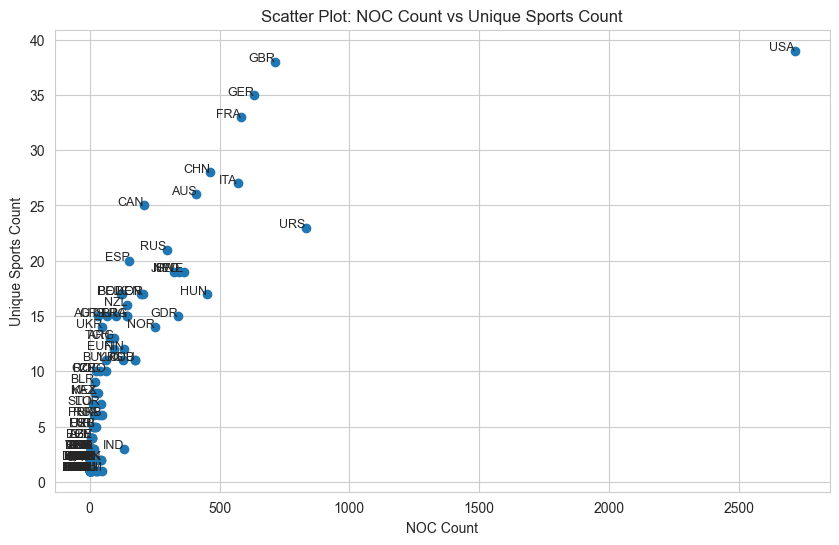

In [24]:
import matplotlib.pyplot as plt
# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_point = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts_medal = noc_counts_medal.loc[sport_counts_medal_point.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_medal, sport_counts_medal_point)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts_medal_point.index, noc_sport_counts_medal, sport_counts_medal_point):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 计算每个 NOC 离散点相对原点的欧氏距离
distances = np.sqrt(noc_sport_counts_medal**2 + sport_counts_medal_point**2)

# 创建一个包含 NOC, NOC count, Unique Sport count 和 欧氏距离的表格
distance_table = pd.DataFrame({
    'NOC': sport_counts_medal_point.index,
    'NOC Count': noc_sport_counts_medal,
    'Unique Sports Count': sport_counts_medal_point,
    'Euclidean Distance': distances
})

# 归一化欧氏距离

# 1. 对欧氏距离进行排名
distance_table['Rank'] = distance_table['Euclidean Distance'].rank()

# 输出结果
distance_table_sorted = distance_table.sort_values(by='Rank')

rank_scaler = MinMaxScaler(feature_range=(0, 1))
distance_table['Normalized Rank'] = rank_scaler.fit_transform(distance_table[['Rank']])

# 输出表格
distance_table


,NOC,NOC Count,Unique Sports Count,Euclidean Distance,Rank,Normalized Rank
NOC,,,,,,
AIN,AIN,1,1,1.414214,11.5,0.000000
ALG,ALG,7,3,7.615773,43.5,0.306220
ANZ,ANZ,20,2,20.099751,60.5,0.468900
ARG,ARG,92,13,92.913939,86.0,0.712919
ARM,ARM,2,1,2.236068,23.0,0.110048
...,...,...,...,...,...,...
UZB,UZB,20,5,20.615528,62.0,0.483254
VEN,VEN,3,3,4.242641,30.0,0.177033
VIE,VIE,1,1,1.414214,11.5,0.000000


In [26]:
# 获取 'NOC' 为 'CHN' 的行，并提取 'Normalized Euclidean Distance' 列
normalized_distance_china = distance_table[distance_table['NOC'] == 'CHN']['Normalized Rank'].values

# 输出结果
print(normalized_distance_china[0])


0.9425837320574162


## 4.2 聚类

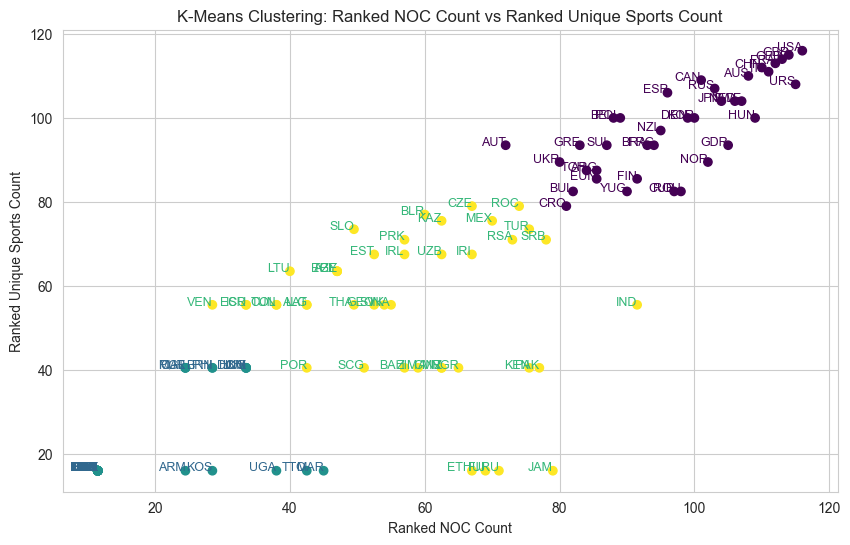

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


In [28]:
# 获取每个聚类中 NOC 的索引
clustered_nocs = {}
for label in np.unique(labels):
    clustered_nocs[label] = sport_counts.index[labels == label].tolist()

# 输出每个类的 NOC
for cluster, km_nocs in clustered_nocs.items():
    print(f"Cluster {cluster}: {km_nocs}")


Cluster 0: ['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BUL', 'CAN', 'CHN', 'CRO', 'CUB', 'DEN', 'ESP', 'EUN', 'FIN', 'FRA', 'FRG', 'GBR', 'GDR', 'GER', 'GRE', 'HUN', 'ITA', 'JPN', 'KOR', 'NED', 'NOR', 'NZL', 'POL', 'ROU', 'RUS', 'SUI', 'SWE', 'TCH', 'UKR', 'URS', 'USA', 'YUG']
Cluster 1: ['AIN', 'ARM', 'BDI', 'BER', 'BOT', 'BRN', 'CHI', 'CIV', 'CRC', 'DMA', 'DOM', 'GRN', 'GUA', 'HAI', 'HKG', 'IOA', 'JOR', 'KOS', 'LCA', 'LUX', 'MAR', 'MGL', 'MOZ', 'PAN', 'PER', 'PHI', 'PUR', 'QAT', 'SGP', 'SUR', 'SYR', 'TJK', 'TTO', 'UAE', 'UGA', 'VIE']
Cluster 2: ['ALG', 'ANZ', 'AZE', 'BAH', 'BLR', 'CMR', 'COL', 'CZE', 'ECU', 'EGY', 'EST', 'ETH', 'FIJ', 'GEO', 'INA', 'IND', 'IRI', 'IRL', 'ISR', 'JAM', 'KAZ', 'KEN', 'LAT', 'LTU', 'MEX', 'NGR', 'PAK', 'POR', 'PRK', 'ROC', 'RSA', 'SCG', 'SLO', 'SRB', 'SVK', 'THA', 'TPE', 'TUN', 'TUR', 'URU', 'UZB', 'VEN', 'ZIM']


## 4.3 构造国家表

In [29]:
noc = 'CHN'

row_values = abs(correlation_df.loc[noc].values)
if noc in clustered_nocs[0]:
    weight = 1
elif noc in clustered_nocs[2]:
    weight = distance_table[distance_table['NOC'] == noc]['Normalized Rank'].values[0]
elif noc in clustered_nocs[1]:
    weight = 0
else:
    weight = 0

# 假设 time_table 是从 medals_per_year[noc] 提取的 Series
if noc in gold_medals_per_year.columns:
    time_table = medals_per_year[noc]
    time_table = time_table.reset_index()  # 转换为 DataFrame
    time_table.columns = ['Year', 'Medal']  # 重命名列为 'Year' 和 'Medal'
else:
    time_table = medals_per_year['USA'].reset_index()
    time_table.columns = ['Year', 'Medal']
    # 将 'Medal' 列的所有值设置为 0
    time_table['Medal'] = 0

# 假设 gold_medals_per_year[noc] 是一个 Series
if noc in gold_medals_per_year.columns:
    gold_column = gold_medals_per_year[noc].reset_index(drop=True)  # 转换为 DataFrame
else:
    gold_column = pd.Series([0] * len(time_table))
gold_column.name = 'Gold'  # 给这一列命名为 'Gold'

# 创建 host_column，所有值填充为 0
host_column = pd.Series([0] * len(time_table), name='Host')
# 将 time_table、gold_column 和 host_column 按列连接

participation_column = participation_per_year[noc].reset_index(drop=True)  # 转换为 DataFrame
participation_column.name = 'Participation'

sport_column = sport_count_per_year[noc].reset_index(drop=True)  # 转换为 DataFrame
sport_column.name = 'Sport'

total_medal_column = yearly_total_medal["Total"].reset_index(drop=True)  # 转换为 DataFrame
total_medal_column.name = 'Medals In All Events'
total_medal_column = total_medal_column.astype(int)

time_table = pd.concat([time_table, gold_column, host_column,participation_column,sport_column,total_medal_column], axis=1)

programs_key = programs_key.reset_index(drop=True)
time_table = pd.concat([time_table, programs_key], axis=1)


# 从 hosts_key 获取与 noc 对应的 Year
host_years = hosts_key[hosts_key['NOC'] == noc]['Year'].values
# 如果找到了对应的 Year，将 time_table 中对应的 Host 列的值设置为 1
for host_year in host_years:
    # 找到 time_table 中 Year 为 host_year 的行，并将 Host 列设置为 1
    time_table.loc[time_table['Year'] == host_year, 'Host'] = 1
    
# 将所有元素转换为整数类型
time_table = time_table.astype(int)

# 去除最后三列
time_table = time_table.drop(time_table.columns[-3:], axis=1)


# 获取 time_table 最后 len(row_values) 列
first_columns = time_table.iloc[:, 4:-len(row_values)]
last_columns = time_table.iloc[:, -len(row_values):]

time_table['Host'] = time_table['Host'] * (10)
# 对每一列和 row_values 中的对应元素进行逐个相乘
for i, col in enumerate(first_columns.columns):
    time_table[col] = time_table[col] * (weight)
for i, col in enumerate(last_columns.columns):
    time_table[col] = time_table[col] * row_values[i] * (1 - weight)


# 获取 time_table 最后 len(row_values) 列
first_columns = time_table.iloc[:, 4:-len(row_values)]
last_columns = time_table.iloc[:, -len(row_values):]
# 对每一列和 row_values 中的对应元素进行逐个相乘
time_table['Host'] = time_table['Host'] * (10)
for i, col in enumerate(first_columns.columns):
    time_table[col] = time_table[col] * (weight)
for i, col in enumerate(last_columns.columns):
    time_table[col] = time_table[col] * row_values[i] * (1 - weight)


# 打印结果
time_table


,Year,Medal,Gold,Host,Participation,Sport,Medals In All Events,SWA,DIV,OWS,...,TTE,TKW,TEN,TRI,TOW,VBV,VVO,WLF,WRF,WRG
0,1896,0,0,0,0,0,122,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900,0,0,0,0,0,284,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1904,0,0,0,0,0,280,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1908,0,0,0,0,0,324,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1912,0,0,0,0,0,312,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1920,0,0,0,0,0,438,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1924,0,0,0,0,0,378,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1928,0,0,0,0,0,327,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1932,0,0,0,2,1,370,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1936,0,0,0,65,7,422,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
gold_medals_per_year

NOC,AFG,AHO,ALB,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,2,2,0,...,0,0,0,11,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,2,0,0,...,0,0,0,19,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,1,0,...,0,0,0,76,0,0,0,0,0,0
1908,0,0,0,0,1,0,0,0,0,0,...,0,0,0,23,0,0,0,0,0,0
1912,0,0,0,0,2,0,0,0,0,0,...,0,0,0,26,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,41,0,0,0,0,0,0
1924,0,0,0,0,0,1,0,3,0,0,...,0,0,1,45,0,0,0,2,0,0
1928,0,0,0,0,0,3,0,1,2,0,...,0,0,1,22,0,0,0,1,0,0
1932,0,0,0,0,0,3,0,3,1,0,...,0,0,0,44,0,0,0,0,0,0


{'MGL', 'BRN', 'ISL', 'PAN', 'AFG', 'CRC', 'CPV', 'POR', 'POL', 'MKD', 'ZIM', 'NED', 'SUR', 'TGA', 'ZAM', 'DEN', 'FIJ', 'SVK', 'UKR', 'LAT', 'UAE', 'SAM', 'TUN', 'KGZ', 'LCA', 'VIE', 'IRQ', 'UGA', 'ITA', 'AUT', 'GRE', 'PER', 'TJK', 'ROT', 'PUR', 'IRI', 'GHA', 'SLO', 'GBR', 'DOM', 'EST', 'DJI', 'CHI', 'SMR', 'PRK', 'LTU', 'JAM', 'URU', 'AZE', 'NGR', 'CRO', 'BAH', 'JOR', 'SUI', 'KOR', 'CMR', 'IOA', 'CIV', 'RSA', 'CAN', 'BEL', 'GEO', 'NZL', 'SGP', 'GAB', 'THA', 'BUR', 'BDI', 'BAR', 'MRI', 'PAK', 'JPN', 'CZE', 'ARG', 'ROC', 'MAS', 'KUW', 'TTO', 'LUX', 'ESP', 'SRI', 'KEN', 'SWE', 'UZB', 'COL', 'INA', 'TPE', 'SRB', 'GRN', 'MDA', 'ERI', 'GUA', 'MOZ', 'ETH', 'KAZ', 'ROU', 'HAI', 'BRA', 'HUN', 'LBN', 'ALG', 'MEX', 'IND', 'ALB', 'KSA', 'TKM', 'BUL', 'QAT', 'FRA', 'SYR', 'TUR', 'BOT', 'NAM', 'ARM', 'ECU', 'EGY', 'NIG', 'CHN', 'RUS', 'PAR', 'MNE', 'SEN', 'HKG', 'TOG', 'GER', 'ISV', 'CYP', 'FIN', 'SUD', 'TAN', 'AUS', 'CUB', 'DMA', 'GUY', 'IRL', 'VEN', 'BLR', 'BER', 'MAR', 'NOR', 'PHI', 'USA', 'KOS'

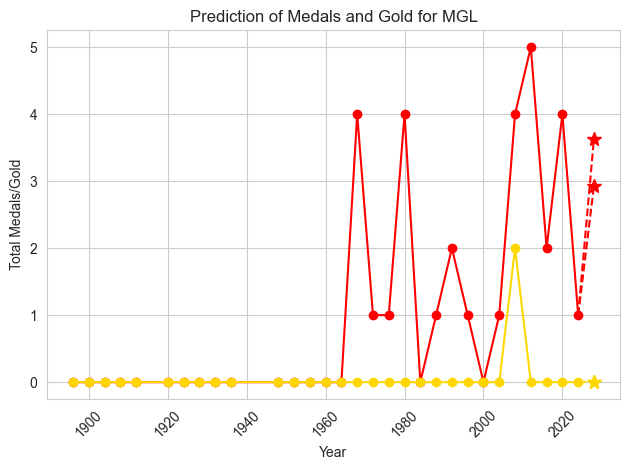

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


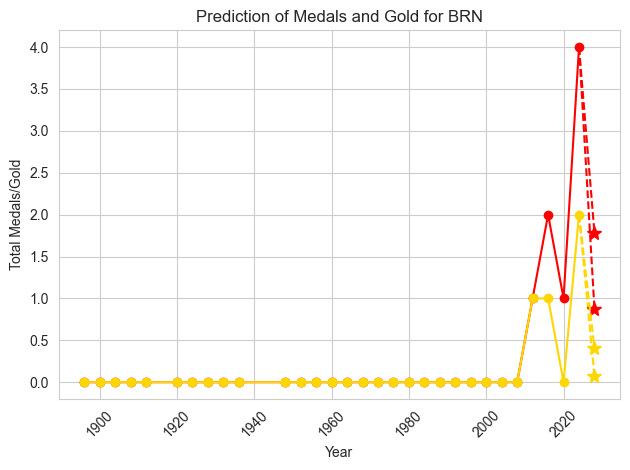

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


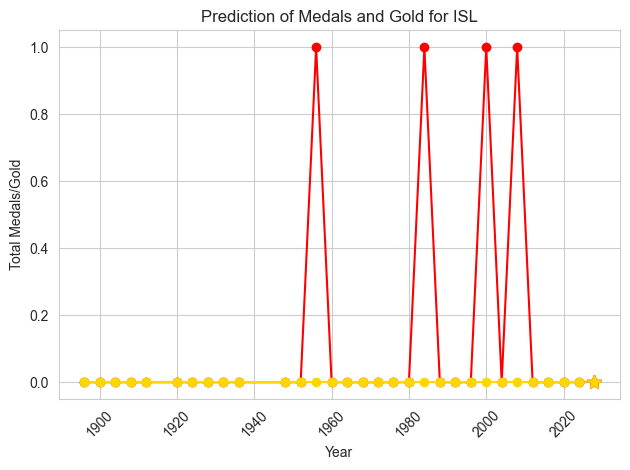

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


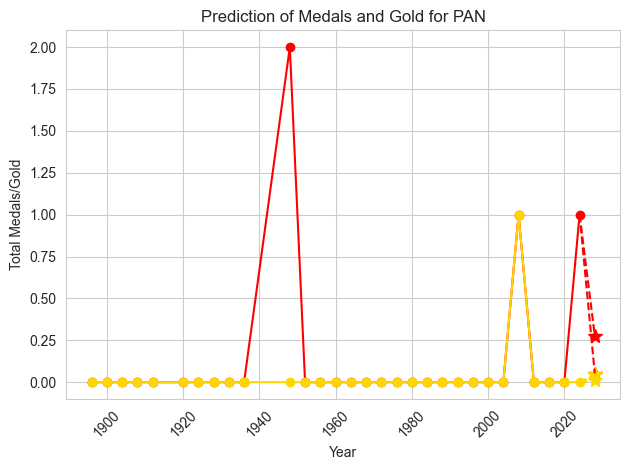

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


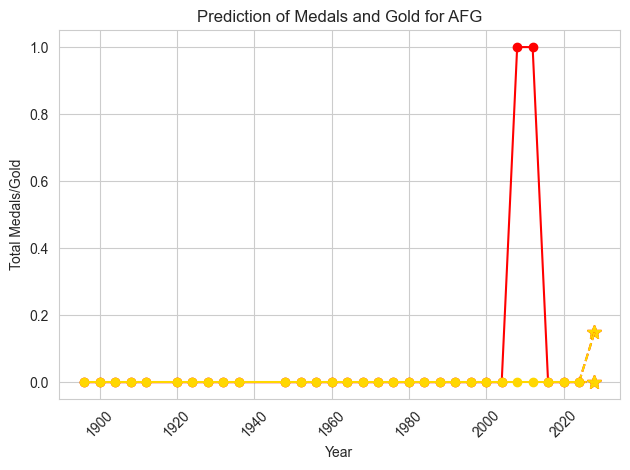

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


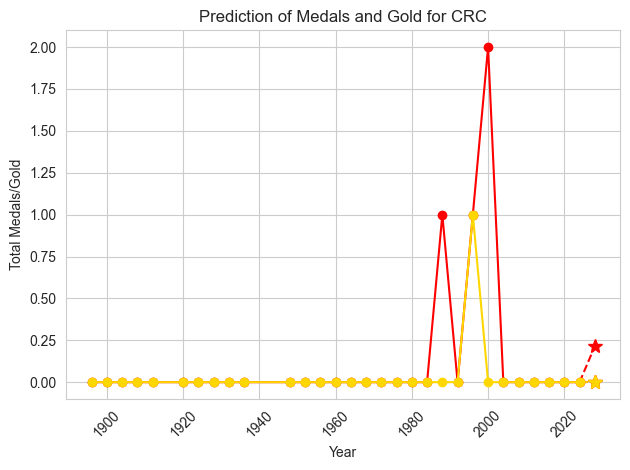

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


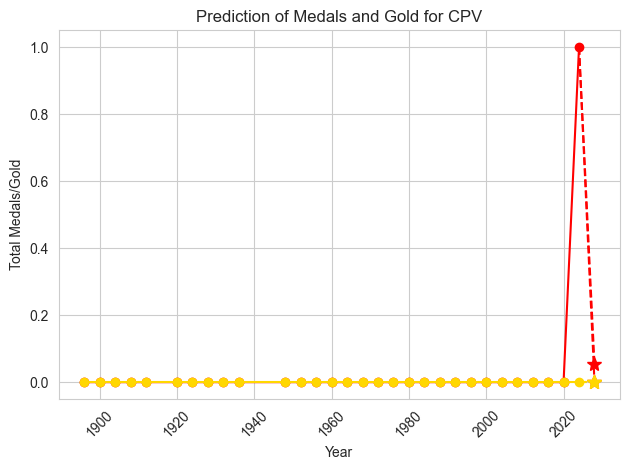

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


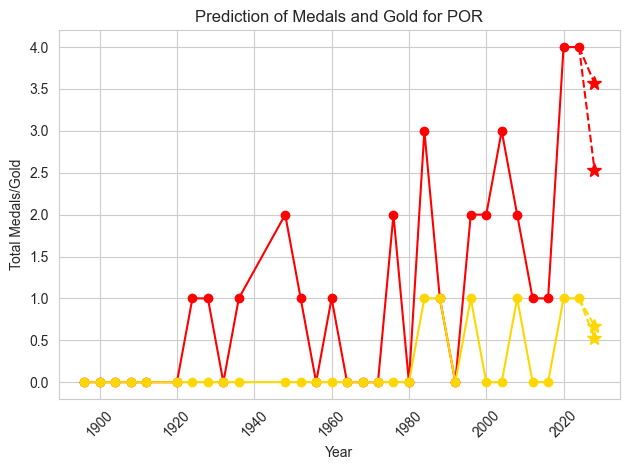

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


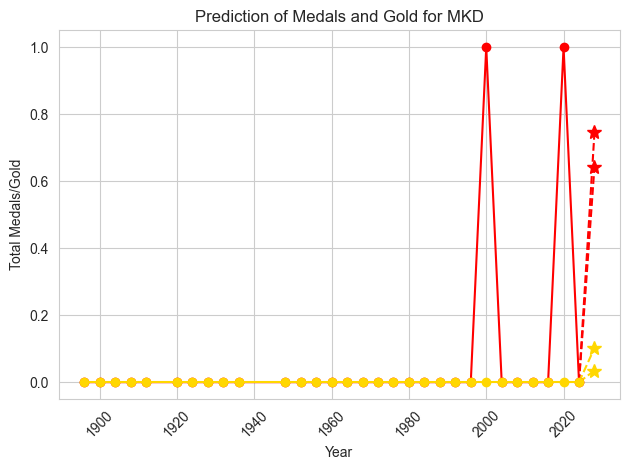

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step



KeyboardInterrupt



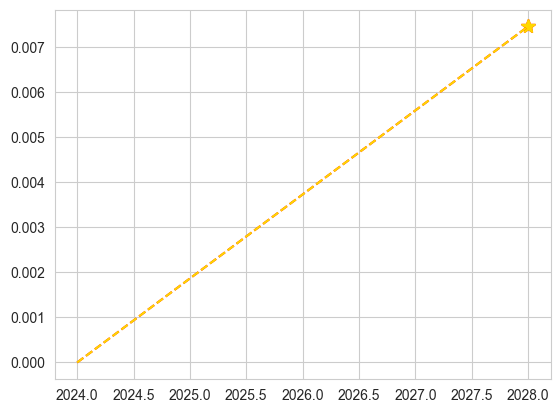

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# 创建一个空的列表，用来存储所有的预测结果和每次的平均损失
predicted_results = []

# 假设 time_table 已经存在并包含相关数据
c = set(nocs) & set(participation_per_year.columns) & set(sport_count_per_year.columns)
print(c)
print(nocs)
print(participation_per_year.columns)
print(sport_count_per_year.columns)

for noc in c:
    if noc == 'POL':
        continue
    row_values = abs(correlation_df.loc[noc].values)
    if noc in clustered_nocs[0]:
        weight = 1
    elif noc in clustered_nocs[2]:
        weight = distance_table[distance_table['NOC'] == noc]['Normalized Rank'].values[0]
    elif noc in clustered_nocs[1]:
        weight = 0
    else:
        weight = 0
    
    # 假设 time_table 是从 medals_per_year[noc] 提取的 Series
    time_table = medals_per_year[noc]
    time_table = time_table.reset_index()  # 转换为 DataFrame
    time_table.columns = ['Year', 'Medal']  # 重命名列为 'Year' 和 'Medal'
    
    if noc in gold_medals_per_year.columns:
        gold_column = gold_medals_per_year[noc].reset_index(drop=True)  # 转换为 Series
        gold_column.name = 'Gold'  # 给这一列命名为 'Gold'
    else:
        gold_column = pd.Series([0] * len(time_table), name='Gold')

    host_column = pd.Series([0] * len(time_table), name='Host')
    participation_column = participation_per_year[noc].reset_index(drop=True)  # 转换为 DataFrame
    participation_column.name = 'Participation'
    sport_column = sport_count_per_year[noc].reset_index(drop=True)  # 转换为 DataFrame
    sport_column.name = 'Sport'
    total_medal_column = yearly_total_medal["Total"].reset_index(drop=True)  # 转换为 DataFrame
    total_medal_column.name = 'Medals In All Events'
    total_medal_column = total_medal_column.astype(int)
    
    time_table = pd.concat([time_table, gold_column, host_column, participation_column, sport_column, total_medal_column], axis=1)
    
    programs_key = programs_key.reset_index(drop=True)
    time_table = pd.concat([time_table, programs_key], axis=1)
    
    # 从 hosts_key 获取与 noc 对应的 Year
    host_years = hosts_key[hosts_key['NOC'] == noc]['Year'].values
    for host_year in host_years:
        time_table.loc[time_table['Year'] == host_year, 'Host'] = 1
        
    time_table = time_table.astype(int)
    time_table = time_table.drop(time_table.columns[-3:], axis=1)

    first_columns = time_table.iloc[:, 4:-len(row_values)]
    last_columns = time_table.iloc[:, -len(row_values):]
    
    time_table['Host'] = time_table['Host'] * 10
    for i, col in enumerate(first_columns.columns):
        time_table[col] = time_table[col] * weight
    for i, col in enumerate(last_columns.columns):
        time_table[col] = time_table[col] * row_values[i] * (1 - weight)
    
    # 数据规范化
    input_columns = time_table.columns.tolist()
    input_columns = [col for col in input_columns if col != 'Year']
    output_columns = ['Medal', 'Gold']
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(time_table[input_columns])
    
    def create_dataset(data, output_columns, time_step=1):
        X, y = [], []
        output_column_indices = [data.columns.get_loc(col) for col in output_columns]
        
        for i in range(len(data) - time_step - 1):
            X.append(data.iloc[i:(i + time_step), :].values)
            y.append(data.iloc[i + time_step, output_column_indices].values) 
        
        return np.array(X), np.array(y)
    
    time_step = 20
    X, y = create_dataset(pd.DataFrame(scaled_data, columns=input_columns), output_columns, time_step)
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
    
    line_color = plt.cm.hsv(0)
    
    for i in range(2):
        model = Sequential()
        model.add(Input(shape=(X.shape[1], X.shape[2])))
        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dense(units=2))
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # 训练模型并记录训练过程中的损失
        history = model.fit(X, y, epochs=50, batch_size=32, verbose=0)
        avg_loss = np.mean(history.history['loss'])  # 获取平均损失
        
        last_data = scaled_data[-time_step:].copy()
        if noc == 'USA':
            last_data[:, 2] = 1  # 假设 Host 列是倒数第 3 列
        last_data = last_data.reshape(1, time_step, X.shape[2])
        
        predicted_scaled = model.predict(last_data)
        
        predicted_values = scaler.inverse_transform(np.concatenate([predicted_scaled, np.zeros((predicted_scaled.shape[0], len(input_columns) - 2))], axis=1))
        
        predicted_medal, predicted_gold = predicted_values[0, 0], predicted_values[0, 1]
        predicted_gold = np.maximum(predicted_gold, 0)
        predicted_medal = np.maximum(predicted_medal, predicted_gold)
        
        # 记录结果
        predicted_results.append({
            'NOC': noc,
            'Predicted Medal': predicted_medal,
            'Predicted Gold': predicted_gold,
            'Average Loss': avg_loss  # 将平均损失添加到结果中
        })
        
        # 绘图
        plt.plot(time_table['Year'].iloc[-1] + 4, predicted_medal, '*', markersize=10, color=line_color)
        plt.plot(time_table['Year'].iloc[-1] + 4, predicted_gold, '*', markersize=10, color='gold')
        plt.plot([time_table['Year'].iloc[-1], time_table['Year'].iloc[-1] + 4], [time_table['Medal'].iloc[-1], predicted_medal], '--', color=line_color)
        plt.plot([time_table['Year'].iloc[-1], time_table['Year'].iloc[-1] + 4], [time_table['Gold'].iloc[-1], predicted_gold], '--', color='gold')

    plt.plot(time_table['Year'], time_table['Medal'], marker='o', linestyle='-', markersize=6, color=line_color)
    plt.plot(time_table['Year'], time_table['Gold'], marker='o', linestyle='-', markersize=6, color='gold',)

    plt.title(f'Prediction of Medals and Gold for {noc}')
    plt.xlabel('Year')
    plt.ylabel('Total Medals/Gold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 将预测结果保存为 DataFrame
predicted_df = pd.DataFrame(predicted_results)

# 显示最终结果
predicted_df


In [ ]:
noc = 'CHN'
if noc == 'CHN':
    if noc in clustered_nocs[0]:
        weight = 1
    elif noc in clustered_nocs[2]:
        weight = distance_table[distance_table['NOC'] == noc]['Normalized Rank'].values[0]
    elif noc in clustered_nocs[1]:
        weight = 0
    else:
        weight = 0
    
    # 假设 time_table 是从 medals_per_year[noc] 提取的 Series
    time_table = medals_per_year[noc]
    time_table = time_table.reset_index()  # 转换为 DataFrame
    time_table.columns = ['Year', 'Medal']  # 重命名列为 'Year' 和 'Medal'
    
    if noc in gold_medals_per_year.columns:
        # 如果noc在gold_medals_per_year的列中，则使用对应的值
        gold_column = gold_medals_per_year[noc].reset_index(drop=True)  # 转换为 Series
        gold_column.name = 'Gold'  # 给这一列命名为 'Gold'
    else:
        # 如果noc不在gold_medals_per_year的列中，则使用全零的Series
        gold_column = pd.Series([0] * len(time_table), name='Gold')

        
    # 创建 host_column，所有值填充为 0
    host_column = pd.Series([0] * len(time_table), name='Host')
    
    participation_column = participation_per_year[noc].reset_index(drop=True)  # 转换为 DataFrame
    participation_column.name = 'Participation'
    
    sport_column = sport_count_per_year[noc].reset_index(drop=True)  # 转换为 DataFrame
    sport_column.name = 'Sport'
    
    total_medal_column = yearly_total_medal["Total"].reset_index(drop=True)  # 转换为 DataFrame
    total_medal_column.name = 'Medals In All Events'
    total_medal_column = total_medal_column.astype(int)
    
    time_table = pd.concat([time_table, gold_column, host_column,participation_column,sport_column,total_medal_column], axis=1)
    
    programs_key = programs_key.reset_index(drop=True)
    time_table = pd.concat([time_table, programs_key], axis=1)
    
    # 从 hosts_key 获取与 noc 对应的 Year
    host_years = hosts_key[hosts_key['NOC'] == noc]['Year'].values
    for host_year in host_years:
        time_table.loc[time_table['Year'] == host_year, 'Host'] = 1
        
    time_table = time_table.astype(int)
    time_table = time_table.drop(time_table.columns[-3:], axis=1)

    # 获取 time_table 最后 len(row_values) 列
    first_columns = time_table.iloc[:, 4:-len(row_values)]
    last_columns = time_table.iloc[:, -len(row_values):]
    
    time_table['Host'] = time_table['Host'] * 10
    for i, col in enumerate(first_columns.columns):
        time_table[col] = time_table[col] * weight
    for i, col in enumerate(last_columns.columns):
        time_table[col] = time_table[col] * row_values[i] * (1 - weight)
    
    # 2. 数据规范化
    input_columns = time_table.columns.tolist()
    input_columns = [col for col in input_columns if col != 'Year']
    output_columns = ['Medal', 'Gold']
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(time_table[input_columns])
    
    def create_dataset(data, output_columns, time_step=1):
        X, y = [], []
        output_column_indices = [data.columns.get_loc(col) for col in output_columns]
        
        for i in range(len(data) - time_step - 1):
            X.append(data.iloc[i:(i + time_step), :].values)
            y.append(data.iloc[i + time_step, output_column_indices].values) 
        
        return np.array(X), np.array(y)
    
    time_step = 20
    X, y = create_dataset(pd.DataFrame(scaled_data, columns=input_columns), output_columns, time_step)
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
    
    line_color = plt.cm.hsv(0)
    
    for i in range(2):
        model = Sequential()
        model.add(Input(shape=(X.shape[1], X.shape[2])))
        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dense(units=2))
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        model.fit(X, y, epochs=50, batch_size=32, verbose=0)
        
        last_data = scaled_data[-time_step:].copy()
        if noc == 'USA':
            last_data[:, 2] = 1  # 假设 Host 列是倒数第 3 列
        last_data = last_data.reshape(1, time_step, X.shape[2])
        
        predicted_scaled = model.predict(last_data)
        
        predicted_values = scaler.inverse_transform(np.concatenate([predicted_scaled, np.zeros((predicted_scaled.shape[0], len(input_columns) - 2))], axis=1))
        
        predicted_medal, predicted_gold = predicted_values[0, 0], predicted_values[0, 1]
        predicted_medal = np.maximum(predicted_medal, 0)
        predicted_gold = np.maximum(predicted_gold, 0)
        
        # 记录结果
        predicted_results.append({
            'NOC': noc,
            'Predicted Medal': predicted_medal,
            'Predicted Gold': predicted_gold
        })
        
        # 绘图
        plt.plot(time_table['Year'].iloc[-1] + 4, predicted_medal, '*', markersize=10, color=line_color)
        plt.plot(time_table['Year'].iloc[-1] + 4, predicted_gold, '*', markersize=10, color='gold')
        plt.plot([time_table['Year'].iloc[-1], time_table['Year'].iloc[-1] + 4], [time_table['Medal'].iloc[-1], predicted_medal], '--', color=line_color)
        plt.plot([time_table['Year'].iloc[-1], time_table['Year'].iloc[-1] + 4], [time_table['Gold'].iloc[-1], predicted_gold], '--', color='gold')
    
    plt.plot(time_table['Year'], time_table['Medal'], marker='o', linestyle='-', markersize=6, color=line_color)
    plt.plot(time_table['Year'], time_table['Gold'], marker='o', linestyle='-', markersize=6, color='gold',)
    
    plt.title(f'Prediction of Medals and Gold for {noc}')
    plt.xlabel('Year')
    plt.ylabel('Total Medals/Gold')
    plt.xticks(rotation=45)
    # plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()